In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load the data

## Meta-data for the full article corpus

In [2]:
df = pd.read_csv("metadata.csv", encoding="latin-1")
df = df.dropna(subset=["PMID"])
df["PMID"] = df["PMID"].astype(int)
print("The corpus has {} articles".format(len(df)))
df.head(3)

The corpus has 18155 articles


,PMID,DOI,KEY,SOURCE,AUTHORS,YEAR,MONTH,JOURNAL,TITLE,PAGES,VOLUME,ABSTRACT_URL,NUM_COORDINATES,MNI_COORDINATES,BRAINMAP_ID,BEHAVIORAL_DOMAIN,EXPERIMENT,DESCRIPTION
0,1402966,NaN,"Dolan R J, 1992",BrainMap,Dolan R J|Bench C J|Brown R G|Scott L C|Fristo...,1992.0,Sep,"Journal of Neurology, Neurosurgery, and Psychi...",Regional cerebral blood flow abnormalities in ...,768-773,55,http://www.ncbi.nlm.nih.gov/entrez/query.fcgi?...,7.0,"-7.66,51.87,-8.33;-5.51,56.46,-4.28;-5.48,58.9...",6030020.0,"['Action.Rest', 'Action.Rest']","['Unimpaired > Impaired', 'Impaired > Unimpair...",Patients with depression who were cognitively ...
1,1410086,NaN,"Bench C J, 1992",BrainMap,Bench C J|Friston K J|Brown R G|Scott L C|Frac...,1992.0,Aug,Psychological Medicine,The anatomy of melancholia - focal abnormaliti...,607-615,22,http://www.ncbi.nlm.nih.gov/entrez/query.fcgi?...,10.0,"-13.68,29.54,33.76;-15.76,23.53,38.75;-39.5,38...",6030018.0,"['Action.Rest', 'Action.Rest', 'Action.Rest']","['Normals > Depressed', 'Unimpaired > Impaired...",Patients with depression and normal subjects u...
2,1448149,10.1038/360339a0,"Zatorre R J, 1992",BrainMap,Zatorre R J|Jones-Gotman M|Evans A C|Meyer E,1992.0,Nov,Nature,Functional localization and lateralization of ...,339-340,360,http://www.ncbi.nlm.nih.gov/entrez/query.fcgi?...,6.0,"-21.56,5.58,-27.71;22.3,6.36,-21.58;18.98,41.4...",8110311.0,['Perception.Olfaction'],['Odor vs. Odorless'],Subjects underwent 2 conditions in which they ...


## Subset with manually curated study and sample information

In [3]:
sub = pd.read_csv("sample_ehb.csv", encoding="latin-1")
sub = sub[:250]
print("The subset has {} articles".format(len(sub)))
sub.head()

The subset has 250 articles


,PMID,MODALITY,MODALITY_CATEGORY,AGE_MIN,AGE_MAX,AGE_MEAN,AGE_SD,N_FEMALE,N_MALE,N
0,27894900,fMRI,Functional MRI,18.0,28.0,21.9,NaN,11.0,6.0,17.0
1,22922525,fMRI,Functional MRI,NaN,NaN,33.2,6.10,12.0,15.0,27.0
2,17336346,fMRI,Functional MRI,NaN,NaN,25.7,10.15,NaN,NaN,20.0
3,19433790,fMRI,Functional MRI,19.0,29.0,22.0,NaN,10.0,5.0,15.0
4,12433382,fMRI,Functional MRI,20.0,36.0,NaN,NaN,6.0,9.0,15.0


# Set the plotting parameters

In [4]:
import sys
sys.path.append("..")
from style.style import *

from matplotlib import font_manager, rcParams

In [5]:
font_prop = font_manager.FontProperties(fname=font, size=18)
rcParams["axes.linewidth"] = 1.5

In [6]:
def plot_ordinal_bar(x, y, filename, height=1.8, width=4.5, xlim=[]):
    
    fig = plt.figure(figsize=(width, height))
    ax = fig.add_axes([0,0,1,1])

    plt.bar(x, y, color="gray", edgecolor="black", alpha=0.65, width=1)
    
    if len(xlim) == 2:
        plt.xlim(xlim)

    plt.xticks(fontproperties=font_manager.FontProperties(fname=font, size=16))
    plt.yticks(fontproperties=font_manager.FontProperties(fname=font, size=16))

    ax.xaxis.set_tick_params(width=1.5, length=7)
    ax.yaxis.set_tick_params(width=1.5, length=7)

    for side in ["right", "top"]:
        ax.spines[side].set_visible(False)

    plt.savefig("figures/{}.png".format(filename), dpi=250, bbox_inches="tight")
    plt.show()

In [7]:
def plot_categorical_bar(x, y, filename, height=1.8, width=4.5, xlabsize=13):
    
    fig = plt.figure(figsize=(width, height))
    ax = fig.add_axes([0,0,1,1])

    plt.bar(x, y, color="gray", edgecolor="black", alpha=0.65, width=1)

    plt.xticks(fontproperties=font_manager.FontProperties(fname=font, size=xlabsize))
    plt.yticks(fontproperties=font_manager.FontProperties(fname=font, size=16))
    
    ax.set_xticklabels(x, rotation=55, ha="right")
    ax.xaxis.set_tick_params(width=1.5, length=7)
    ax.yaxis.set_tick_params(width=1.5, length=7)

    for side in ["right", "top"]:
        ax.spines[side].set_visible(False)

    plt.savefig("figures/{}.png".format(filename), dpi=250, bbox_inches="tight")
    plt.show()

In [8]:
def plot_hist(y, filename, width=4.5, barwidth=1):
    
    fig = plt.figure(figsize=(width, 1.8))
    ax = fig.add_axes([0,0,1,1])

    plt.hist(y, color="gray", edgecolor="black", alpha=0.65, width=barwidth)

    plt.xticks(fontproperties=font_manager.FontProperties(fname=font, size=16))
    plt.yticks(fontproperties=font_manager.FontProperties(fname=font, size=16))

    ax.xaxis.set_tick_params(width=1.5, length=7)
    ax.yaxis.set_tick_params(width=1.5, length=7)

    for side in ["right", "top"]:
        ax.spines[side].set_visible(False)

    plt.savefig("figures/{}.png".format(filename), dpi=250, bbox_inches="tight")
    plt.show()

# Plot full cohort information

## Publication year

In [9]:
df["YEAR"] = df["YEAR"].astype(int)

In [10]:
years = sorted(list(set(df["YEAR"])))
n_per_year = [sum(df["YEAR"] == yr) for yr in years]

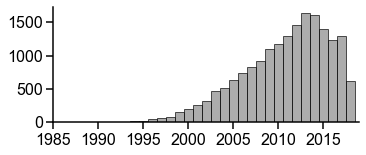

In [11]:
plot_ordinal_bar(years, n_per_year, "publication_year", xlim=[1985,2019], height=1.6, width=4.25)

## Journal

In [12]:
df["JOURNAL"] = [j.strip().title() for j in df["JOURNAL"]]

In [13]:
journals = list(set(df["JOURNAL"]))
n_per_journal = [sum(df["JOURNAL"] == j) for j in journals]
j_ser = pd.Series(n_per_journal, index=journals).sort_values(ascending=False)[:15]
j_ser

Neuroimage                                                                            3161
Human Brain Mapping                                                                   1289
Plos One                                                                              1034
The Journal Of Neuroscience : The Official Journal Of The Society For Neuroscience     878
Neuropsychologia                                                                       810
Cerebral Cortex (New York, N.Y. : 1991)                                                731
Journal Of Cognitive Neuroscience                                                      647
Frontiers In Human Neuroscience                                                        483
Social Cognitive And Affective Neuroscience                                            440
Brain Research                                                                         391
Biological Psychiatry                                                                  375

In [14]:
names = {"Neuroimage": "NeuroImage",
         "Human Brain Mapping": "Human Brain Mapping",
         "Plos One": "PloS One",
         "The Journal Of Neuroscience : The Official Journal Of The Society For Neuroscience": "Journal of Neuro.",
         "Neuropsychologia": "Neuropsychologia",
         "Cerebral Cortex (New York, N.Y. : 1991)": "Cerebral Cortex",
         "Journal Of Cognitive Neuroscience": "Journal of Cog. Neuro.",
         "Frontiers In Human Neuroscience": "Frontiers in Hum. Neuro.",
         "Social Cognitive And Affective Neuroscience": "SCAN",
         "Brain Research": "Brain Research",
         "Biological Psychiatry": "Biological Psychiatry",
         "Psychiatry Research": "Psychiatry Research",
         "Neuroscience Letters": "Neuroscience Letters",
         "Cortex; A Journal Devoted To The Study Of The Nervous System And Behavior": "Cortex",
         "Brain And Language": "Brain & Language"}
j_ser.index = [names[j] for j in j_ser.index]
j_ser

NeuroImage                  3161
Human Brain Mapping         1289
PloS One                    1034
Journal of Neuro.            878
Neuropsychologia             810
Cerebral Cortex              731
Journal of Cog. Neuro.       647
Frontiers in Hum. Neuro.     483
SCAN                         440
Brain Research               391
Biological Psychiatry        375
Psychiatry Research          330
Neuroscience Letters         275
Cortex                       243
Brain & Language             239
dtype: int64

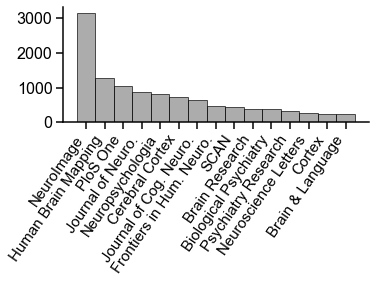

In [15]:
plot_categorical_bar(j_ser.index, j_ser.values, "journal", xlabsize=15, height=1.6, width=4.25)

# Plot subset information

## Imaging modality

In [32]:
# sub["MODALITY"] = [m if m in ["fMRI", "PET"] else "Other" for m in sub["MODALITY"]]
# mod = ["fMRI", "Other", "PET"]
mod = ["Functional MRI", "Structural MRI", "PET", "Other"]
n_per_mod = [sum(sub["MODALITY_CATEGORY"] == m) for m in mod]

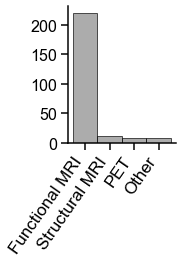

In [50]:
plot_categorical_bar(mod, n_per_mod, "modality", height=1.9, width=1.5, xlabsize=17)

## Number of subjects

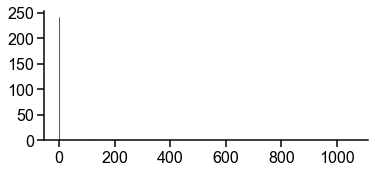

In [18]:
plot_hist(sub["N"].values, "n_subjects")

In [19]:
np.mean(sub["N"])

43.348

In [20]:
np.std(sub["N"])

88.27363647205208

## Gender

In [21]:
np.mean(sub["N_FEMALE"])

18.864406779661017

In [22]:
np.std(sub["N_FEMALE"])

28.63517312506294

In [23]:
np.mean(sub["N_MALE"])

19.258474576271187

In [24]:
np.std(sub["N_MALE"])

31.429045257670108

## Age

In [25]:
np.mean(sub["AGE_MEAN"])

30.245108024708333

In [26]:
np.std(sub["AGE_MEAN"])

13.34773807130704

/anaconda3/envs/ontol/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/ontol/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


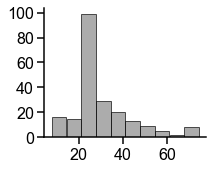

In [27]:
plot_hist(sub["AGE_MEAN"].values, "age_mean", barwidth=6.6, width=2.25)

In [28]:
np.mean(sub["AGE_MIN"])

20.856047619050003

In [29]:
np.std(sub["AGE_MIN"])

9.5402648176726

In [30]:
np.mean(sub["AGE_MAX"])

40.61983091787681

In [31]:
np.std(sub["AGE_MAX"])

17.94620014289056